In [2]:
import pandas as pd # 데이터 핸들링 
import numpy as np 
import matplotlib.pyplot as plt # 데이터 시각화 
%matplotlib inline
import seaborn as sns # 데이터 시각화(고급분석)
import warnings
import json
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [4]:
from matplotlib import rc
rc('font', family='AppleGothic') # 한글 깨짐 방지

## 1. 평점파일 불러오기

In [16]:
ratings = pd.read_csv('/Users/sewoongmoon/Downloads/ratings_small.csv') # 

In [17]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [23]:
movies = pd.read_csv('/Users/sewoongmoon/Documents/movies_small.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
# 장르 리스트

genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [36]:
genres_rating_list = []

In [37]:

    
# 아래 for문은 위의 리스트에서 각각의 element를 불러옵니다.
    # 한번 반복할 때마다, 영화 데이터 프레임에서 하나의 장르를 선택
    # 선택된 데이터 프레임의 평점을 얻기 위해서 이 데이터와 평점 데이터를 Merge 시킴
    # Merge 된 데이터가 만들어지면, Mean 함수를 이용해서 해당 장르의 평균을 구함
    # 장르와 해당 평균 평점은 genres_rating 데이터 프레임에 Append 
    # 이 for 문 실행시 시간이 조금 걸릴 수 있음
    
for i in range(len(genres)):
    fil = genres[i]+'_filter'
    mov = genres[i]+'_movies'
    rat = genres[i]+'_ratings'
    rat_mean = rat+'_mean'
    fil = movies['genres'].str.contains(genres[i])
    mov = movies[fil]
    rat = mov.merge(ratings, on='movieId', how='inner')
    rat_mean = round(rat['rating'].mean(), 2)
    #print(genres[i], round(rat_mean,2))
    genres_rating_list.append(rat_mean)

In [38]:
df = {'Genre':genres, 'Genres Mean Rating':genres_rating_list}

In [39]:
genres_rating = pd.DataFrame(df)


In [41]:
genres_rating

,Genre,Genres Mean Rating
0,Action,3.45
1,Adventure,3.51
2,Animation,3.63
3,Children,3.41
4,Comedy,3.38
5,Crime,3.66
6,Documentary,3.80
7,Drama,3.66
8,Fantasy,3.49
9,Film-Noir,3.92


In [46]:
## 데이터프레임에 '표준편차' 칼럼 추가
genres_rating['Genres Standard Deviation'] = genres_rating['Genres Mean Rating'].std()
## '전체 영화 평균 평점' 추가
genres_rating['Mean'] = genres_rating['Genres Mean Rating'].mean()

genres_rating['Zero'] = 0

In [48]:
genres_rating

,Genre,Genres Mean Rating,Genres Standard Deviation,Mean,Zero
0,Action,3.45,0.164632,3.567222,0
1,Adventure,3.51,0.164632,3.567222,0
2,Animation,3.63,0.164632,3.567222,0
3,Children,3.41,0.164632,3.567222,0
4,Comedy,3.38,0.164632,3.567222,0
5,Crime,3.66,0.164632,3.567222,0
6,Documentary,3.80,0.164632,3.567222,0
7,Drama,3.66,0.164632,3.567222,0
8,Fantasy,3.49,0.164632,3.567222,0
9,Film-Noir,3.92,0.164632,3.567222,0


In [49]:
# 전체 영화 평균 -> 소수 두번째자리에서 반올림
overall_mean = round(genres_rating['Genres Mean Rating'].mean(), 2)
overall_std = round(genres_rating['Genres Mean Rating'].std(),2)
scifi_rating = genres_rating[genres_rating['Genre'] == 'Sci-Fi']['Genres Mean Rating']

In [51]:
# {(전체 영화 평균) - (장르별 영화 평균)} 칼럼 생성
genres_rating['Diff from Mean'] = genres_rating['Genres Mean Rating'] - overall_mean


In [52]:
genres_rating.head()


,Genre,Genres Mean Rating,Genres Standard Deviation,Mean,Zero,Diff from Mean
0,Action,3.45,0.164632,3.567222,0,-0.12
1,Adventure,3.51,0.164632,3.567222,0,-0.06
2,Animation,3.63,0.164632,3.567222,0,0.06
3,Children,3.41,0.164632,3.567222,0,-0.16
4,Comedy,3.38,0.164632,3.567222,0,-0.19


In [54]:
genres_rating

,Genre,Genres Mean Rating,Genres Standard Deviation,Mean,Zero,Diff from Mean
0,Action,3.45,0.164632,3.567222,0,-0.12
1,Adventure,3.51,0.164632,3.567222,0,-0.06
2,Animation,3.63,0.164632,3.567222,0,0.06
3,Children,3.41,0.164632,3.567222,0,-0.16
4,Comedy,3.38,0.164632,3.567222,0,-0.19
5,Crime,3.66,0.164632,3.567222,0,0.09
6,Documentary,3.80,0.164632,3.567222,0,0.23
7,Drama,3.66,0.164632,3.567222,0,0.09
8,Fantasy,3.49,0.164632,3.567222,0,-0.08
9,Film-Noir,3.92,0.164632,3.567222,0,0.35


In [55]:

genre_list = list(genres_rating['Genre'])

In [56]:
genres_rating_list = list(genres_rating['Genres Mean Rating'])
genres_diff_list = list(genres_rating['Diff from Mean'])

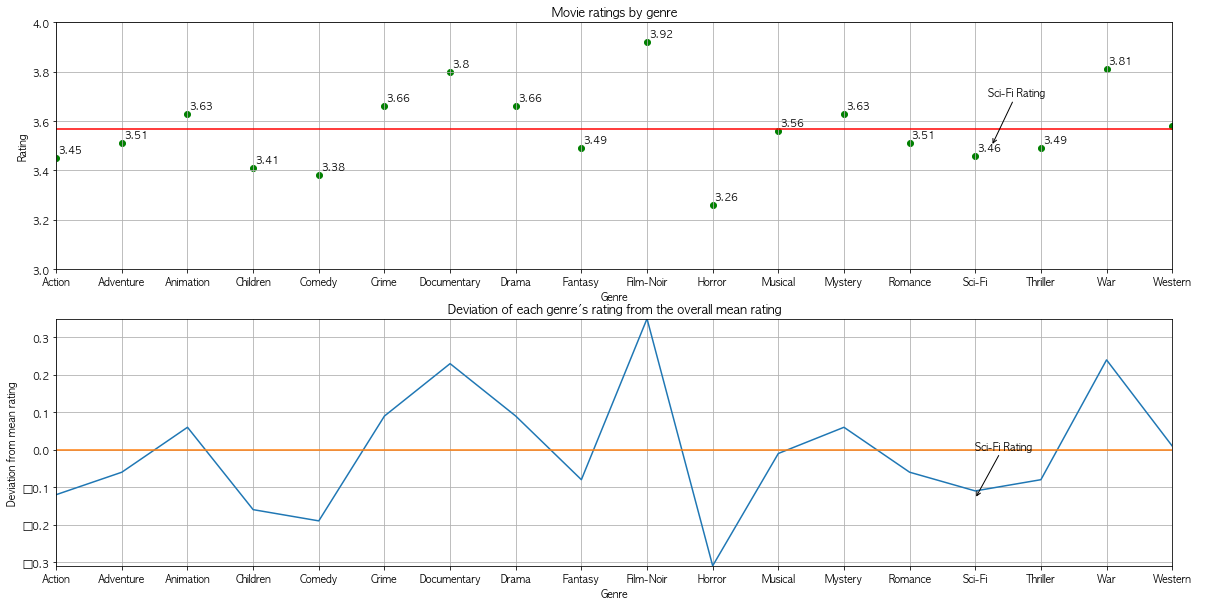

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.subplot(2,1,1)
x = [x for x in range(0, 18)]
xticks_genre_list = genre_list
y = genres_rating_list
plt.xticks(range(len(x)), xticks_genre_list)
plt.scatter(x,y, color='g')
plt.plot(x, genres_rating['Mean'], color="red")
plt.autoscale(tight=True)
#plt.rcParams["figure.figsize"] = (10,2)
plt.title('Movie ratings by genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.ylim(ymax = 4, ymin = 3)
plt.grid(True)
plt.savefig(r'movie-ratings-by-genre.png')

plt.annotate("Sci-Fi Rating",
            xy=(14.25,3.5), xycoords='data',
            xytext=(14.20, 3.7), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

for i,j in enumerate( y ):
    ax1.annotate( j, ( x[i] + 0.03, y[i] + 0.02))

ax2 = plt.subplot(2,1,2)
x = [x for x in range(0, 18)]
xticks_genre_list = genre_list
y = genres_rating['Diff from Mean']
plt.xticks(range(len(x)), xticks_genre_list)
plt.plot(x,y)
plt.plot(x, genres_rating['Zero'])
plt.autoscale(tight=True)
#plt.rcParams["figure.figsize"] = (10,2)
plt.title('Deviation of each genre\'s rating from the overall mean rating')
plt.xlabel('Genre')
plt.ylabel('Deviation from mean rating')
plt.grid(True)
plt.savefig(r'deviation-from-mean-rating.png')

plt.annotate("Sci-Fi Rating",
            xy=(14,-0.13), xycoords='data',
            xytext=(14.00, 0.0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


plt.show()


## <장르별 평균 평점 시각화>

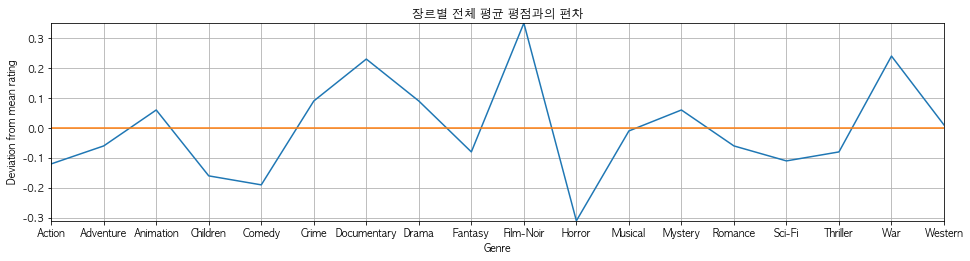

In [143]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지


for i,j in enumerate( y ):
    ax1.annotate( j, ( x[i] + 0.03, y[i] + 0.02))

ax2 = plt.subplot(2,1,2)
x = [x for x in range(0, 18)]
xticks_genre_list = genre_list
y = genres_rating['전체평균-장르평균']
plt.xticks(range(len(x)), xticks_genre_list)
plt.plot(x,y)
plt.plot(x, genres_rating['Zero'])
plt.autoscale(tight=True)
plt.rcParams["figure.figsize"] = (16,8)
plt.title('장르별 전체 평균 평점과의 편차')
plt.xlabel('Genre')
plt.ylabel('Deviation from mean rating')
plt.grid(True)
plt.savefig(r'deviation-from-mean-rating.png')




plt.show()

# 영화 데이터 평점순 정리


In [151]:
db = pd.merge(ratings, movies , on = 'movieId', how = 'inner')
db

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


# 평가수가 가장 많은 영화 TOP 25

In [152]:
most_rated = db.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

## 영화별로 평균평점을 구해보자


In [114]:
movie_stats = db.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating     
                                          size mean
title                                              
'71 (2014)                                   1  4.0
'Hellboy': The Seeds of Creation (2004)      1  4.0
'Round Midnight (1986)                       2  3.5
'Salem's Lot (2004)                          1  5.0
'Til There Was You (1997)                    2  4.0

In [154]:
# 이번엔 평점순으로 정리하자!
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                      size mean
title                                          
Gena the Crocodile (1969)              1.0  5.0
True Stories (1986)                    1.0  5.0
Cosmic Scrat-tastrophe (2015)          1.0  5.0
Love and Pigeons (1985)                1.0  5.0
Red Sorghum (Hong gao liang) (1987)    1.0  5.0



### <문제점! : 영화 평가수가 적고 높은 영화가 발생(ex: 평가수가 1개이고 그 평점이 5점인 경우 이상치로 인식)>





### <해결법: 영화 평가수가 최소 50개 이상인 영화들에 평점순 정렬>



In [157]:
# 평가수 > 50, 평점순 TOP 15 

atleast_50 = movie_stats['rating']['size'] >= 50
movie_stats[atleast_50].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                                     size      mean
title                                                              
Shawshank Redemption, The (1994)                    317.0  4.429022
Godfather, The (1972)                               192.0  4.289062
Fight Club (1999)                                   218.0  4.272936
Cool Hand Luke (1967)                                57.0  4.271930
Dr. Strangelove or: How I Learned to Stop Worry...   97.0  4.268041
Rear Window (1954)                                   84.0  4.261905
Godfather: Part II, The (1974)                      129.0  4.259690
Departed, The (2006)                                107.0  4.252336
Goodfellas (1990)                                   126.0  4.250000
Casablanca (1942)                                   100.0  4.240000
Dark Knight, The (2008)                             149.0  4.238255
Usual Suspects, The (1995)                          204.0  4.237745
Princess Bride, The (1987)                          142.0  4.232394
Star Wars: Episode IV - A New Hope (1977)           251.0  4.231076
Schindler's List (1993)                             220.0  4.225000

In [158]:
# movies 데이터프레임을 리스트로 변환 
list(movies)

['movieId', 'title', 'genres']

## 유저들의 연령분포

In [61]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

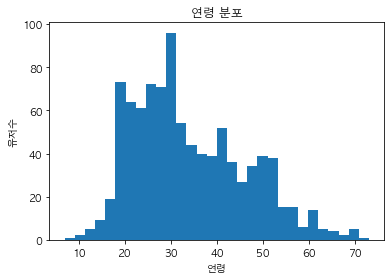

In [62]:
users.age.plot.hist(bins=30)
plt.title("연령 분포")
plt.ylabel('유저수')
plt.xlabel('연령');

In [66]:
# most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

In [ ]:
## 연령별 칼럼생성

In [120]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [121]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})


rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [122]:
lens.set_index('movie_id', inplace=True)

In [131]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  0-9               NaN
                      10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          0-9               NaN
                      10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
Name: rating, dtype: float64

In [132]:
## 평점이 없는 Nan값에 0으로 대체
by_age.rating.mean().unstack(0).fillna(0)

title,Air Force One (1997),Alien (1979),Aliens (1986),Amadeus (1984),Back to the Future (1985),"Birdcage, The (1996)",Braveheart (1995),Conspiracy Theory (1997),Contact (1997),Dead Man Walking (1995),...,Star Trek: First Contact (1996),Star Wars (1977),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),Twelve Monkeys (1995),Twister (1996),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971)
age_group,,,,,,,,,,,,,,,,,,,,,
0-9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000
10-19,3.647059,4.111111,4.050000,4.250000,4.037037,3.217391,4.384615,3.565217,3.693878,3.647059,...,3.576923,4.630435,4.173913,3.619048,4.611111,3.621622,3.916667,3.000000,3.500000,3.387097
20-29,3.666667,4.026087,4.087719,4.067308,3.720588,3.413223,4.194915,3.382114,3.785714,3.926606,...,3.641975,4.413043,3.969466,3.875969,4.336066,3.920635,3.847458,3.200000,4.000000,3.820144
30-39,3.570000,4.103448,3.887640,4.236842,3.915789,3.514286,4.156627,3.419355,3.847458,3.814286,...,3.737864,4.305732,3.977011,4.105882,4.236111,4.033058,3.788462,3.133333,3.882353,3.908046
40-49,3.555556,3.833333,3.526316,4.081633,4.036364,3.500000,4.051282,3.465116,3.866667,3.754386,...,3.760000,4.166667,4.212121,3.975610,3.984848,3.700000,3.653846,3.479167,3.825000,3.058824
50-59,3.750000,4.272727,4.235294,4.230769,3.500000,3.346154,3.956522,3.538462,3.739130,4.294118,...,3.272727,4.469388,3.941176,3.900000,4.210526,3.758621,3.650000,3.300000,3.904762,2.857143
60-69,3.666667,3.500000,3.800000,4.750000,3.857143,3.888889,3.714286,2.600000,3.777778,4.000000,...,3.000000,4.000000,3.500000,3.600000,3.846154,3.400000,3.000000,3.250000,3.800000,3.000000
70-79,3.666667,4.000000,3.000000,5.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,5.000000,4.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,4.500000,0.000000


In [142]:
## 영화들의 연령별 평균점수  
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


In [147]:
#10대가 높은 평점을 준 순서로 정렬

by_age.rating.mean().unstack(1).fillna(0)[10:20].sort_values(by= '10-19',ascending=False)

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
Independence Day (ID4) (1996),0.0,3.595238,3.291429,3.389381,3.718750,3.888889,2.750000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


## 남녀별 영화 평균 점수

In [133]:
lens.reset_index('movie_id', inplace=True)

In [134]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [135]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [136]:
pivoted.reset_index('movie_id', inplace=True)

## 영화별 남VS여 평균평점차이

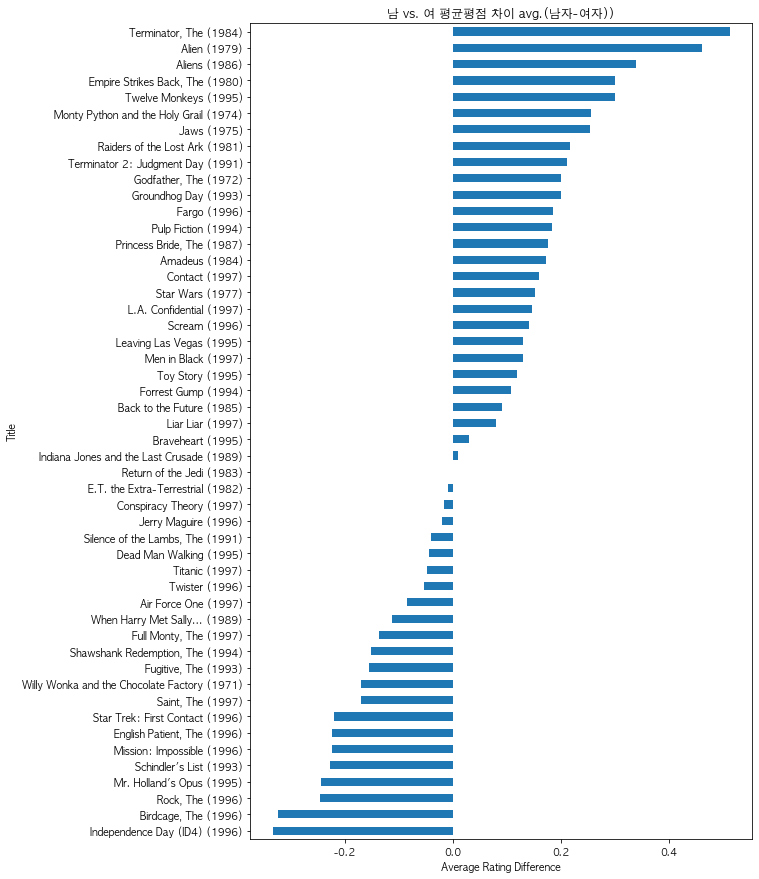

In [139]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('남 vs. 여 평균평점 차이 avg.(남자-여자))')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');